In [ ]:
###

In [47]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [48]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [49]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [50]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [51]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [52]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


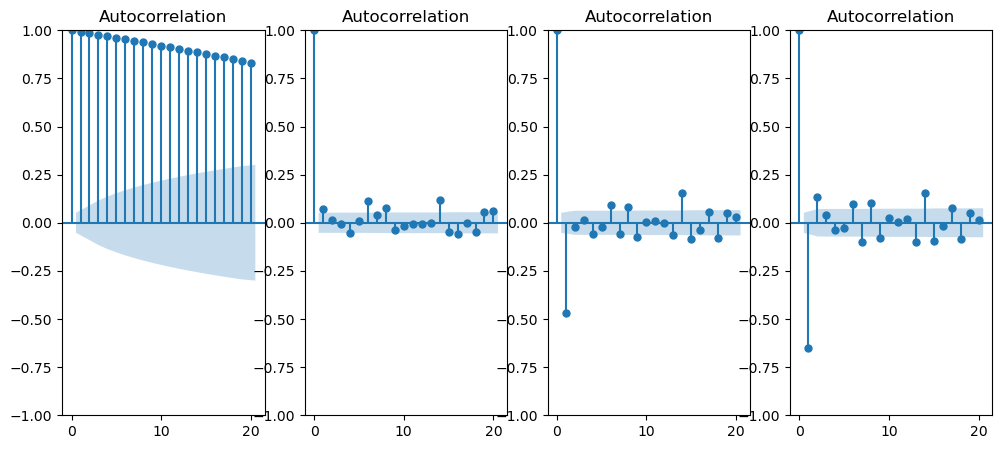

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 4, figsize=(12, 5))

plot_acf(bitcoin_df, lags=20, ax=ax[0])
plot_acf(bitcoin_df.diff().dropna(), lags=20, ax=ax[1])
plot_acf(bitcoin_df.diff().diff().dropna(), lags=20, ax=ax[2])
plot_acf(bitcoin_df.diff().diff().diff().dropna(), lags=20, ax=ax[3])
plt.show()

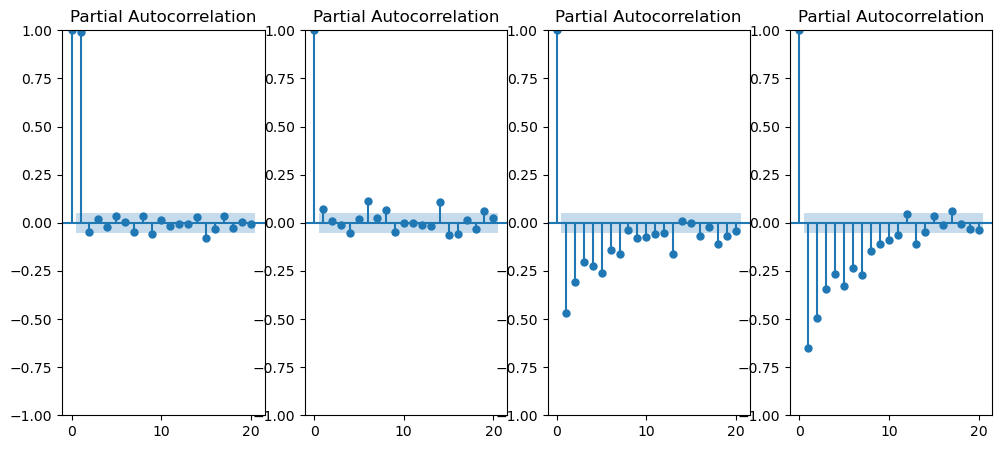

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 4, figsize=(12, 5))

plot_pacf(bitcoin_df, lags=20, ax=ax[0])
plot_pacf(bitcoin_df.diff().dropna(), lags=20, ax=ax[1])
plot_pacf(bitcoin_df.diff().diff().dropna(), lags=20, ax=ax[2])
plot_pacf(bitcoin_df.diff().diff().diff().dropna(), lags=20, ax=ax[3])
plt.show()

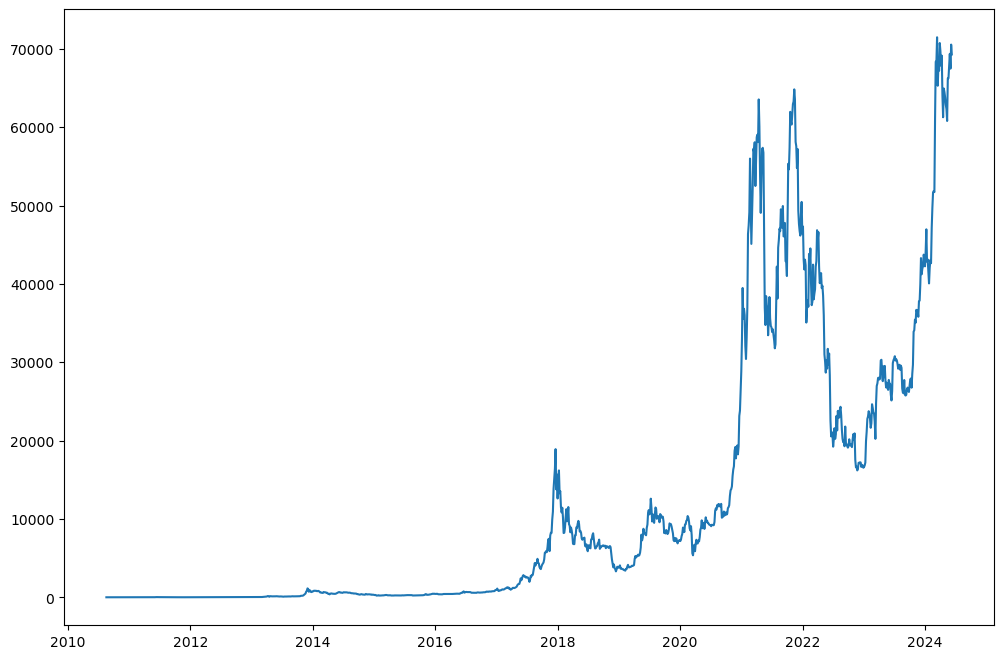

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.plot(bitcoin_df)


In [17]:
a = bitcoin_df[bitcoin_df['y'] == 0]
a

,y
x,
2009-01-03,0.0
2009-01-07,0.0
2009-01-11,0.0
2009-01-15,0.0
2009-01-19,0.0
...,...
2010-07-29,0.0
2010-08-02,0.0
2010-08-06,0.0


In [18]:
bitcoin_df = bitcoin_df[bitcoin_df['y'] != 0]

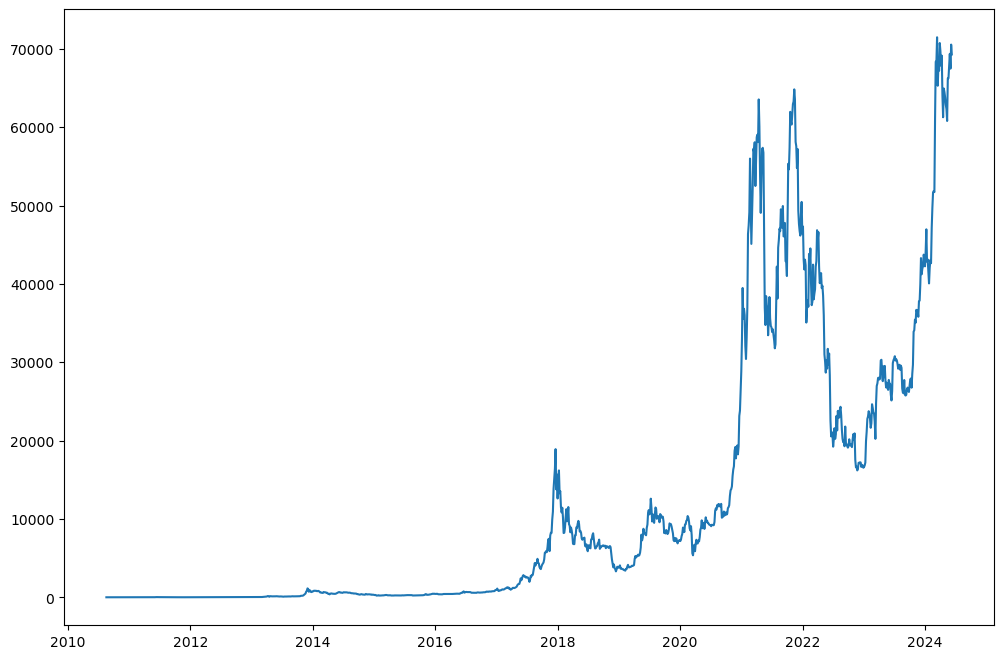

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.plot(bitcoin_df)


In [22]:
filtered_df = bitcoin_df[bitcoin_df.index >= '2017-01-01']

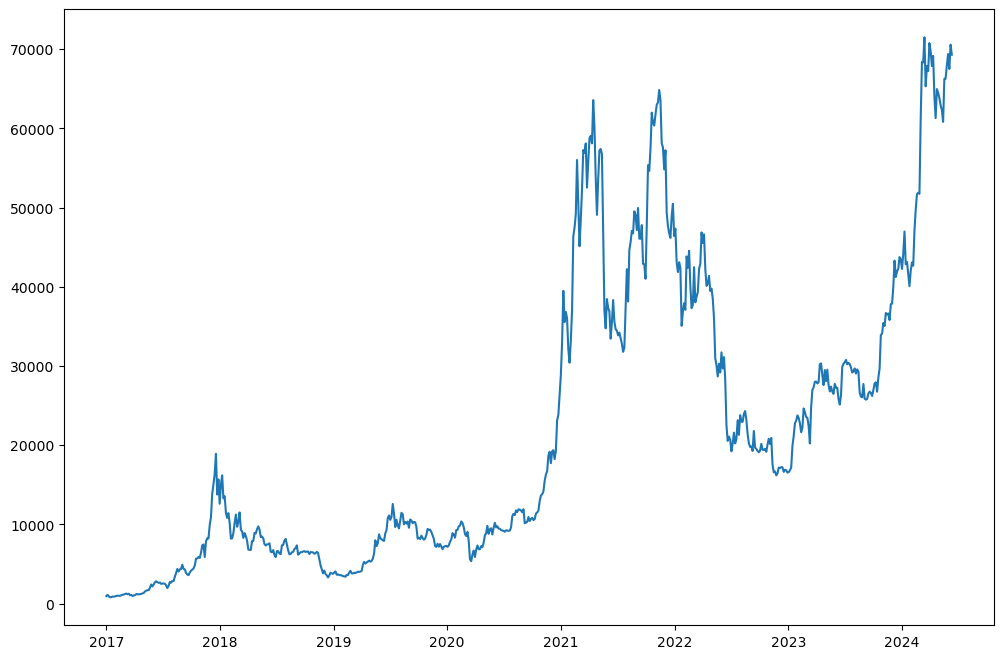

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.plot(filtered_df)


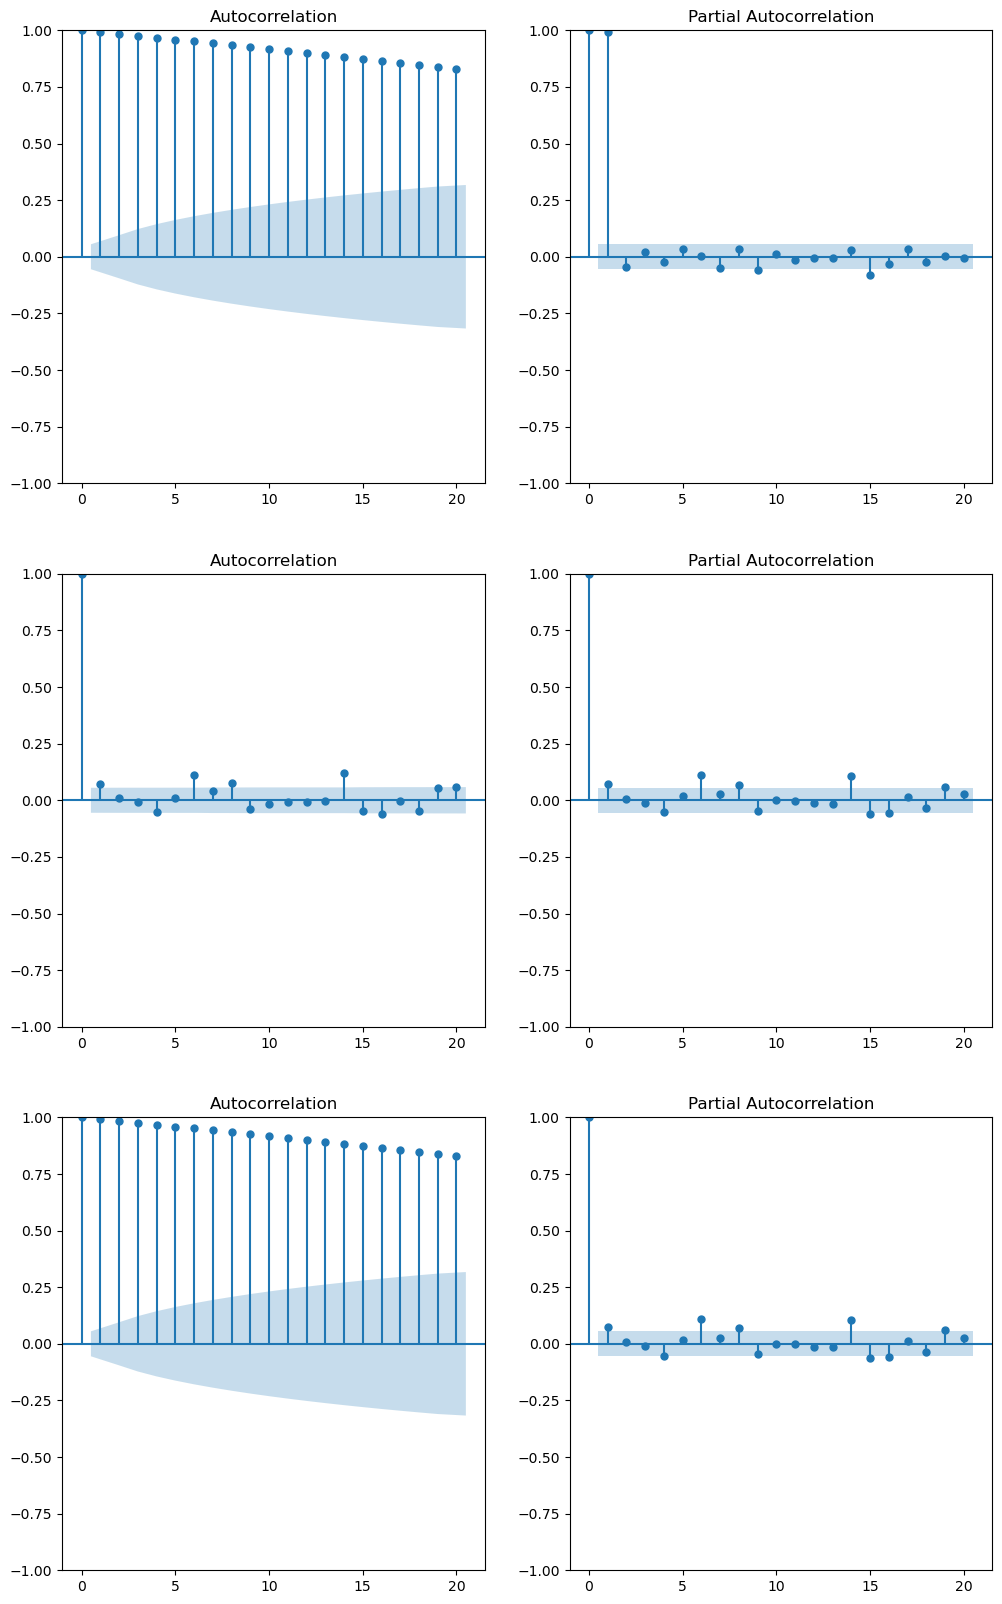

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3, 2, figsize=(12, 20))

plot_acf(bitcoin_df, lags=20, ax=ax[0][0])
plot_pacf(bitcoin_df, lags=20, ax=ax[0][1])

plot_acf(bitcoin_df.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(bitcoin_df.diff().dropna(), lags=20, ax=ax[1][1])

plot_acf(bitcoin_df, lags=20, ax=ax[2][0])
plot_pacf(bitcoin_df.diff().dropna(), lags=20, ax=ax[2][1])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)


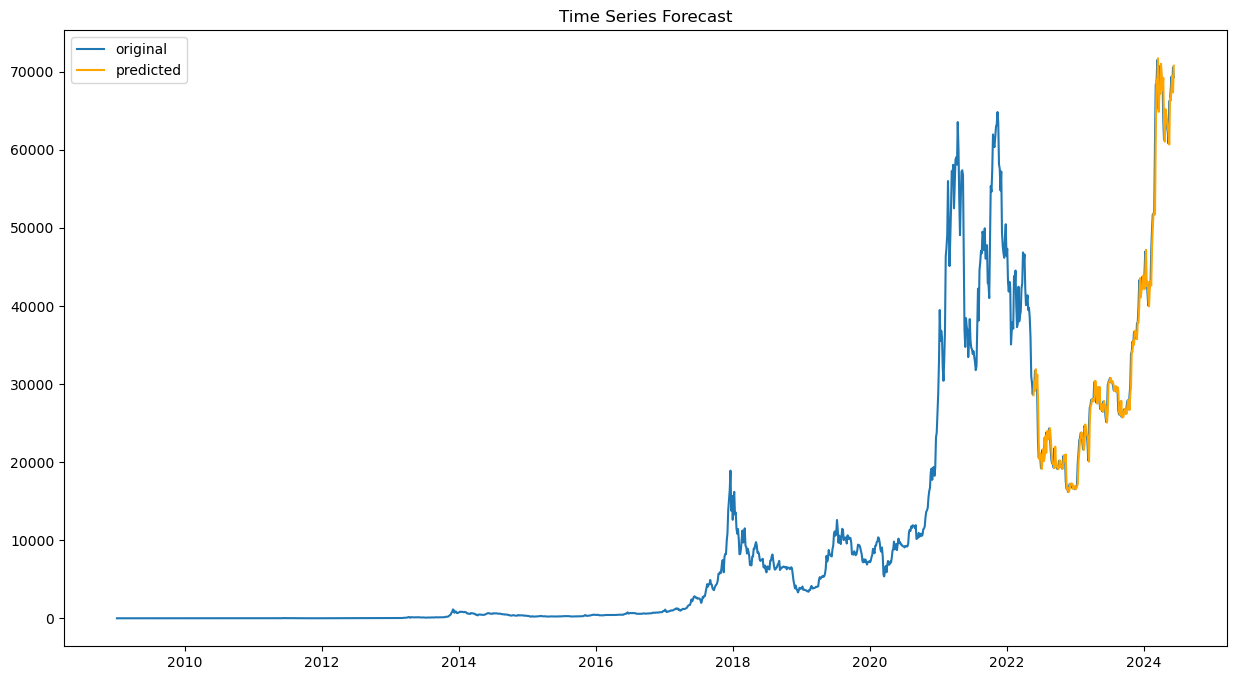

In [54]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(bitcoin_df, order=(2, 1, 1))
model_fit = model.fit()

start_index = pd.to_datetime('2017-05-25')
end_index = pd.to_datetime('2024-06-09')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(bitcoin_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [27]:
bitcoin_df

,y
x,
2010-08-18,0.07
2010-08-22,0.07
2010-08-26,0.07
2010-08-30,0.07
2010-09-03,0.06
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)


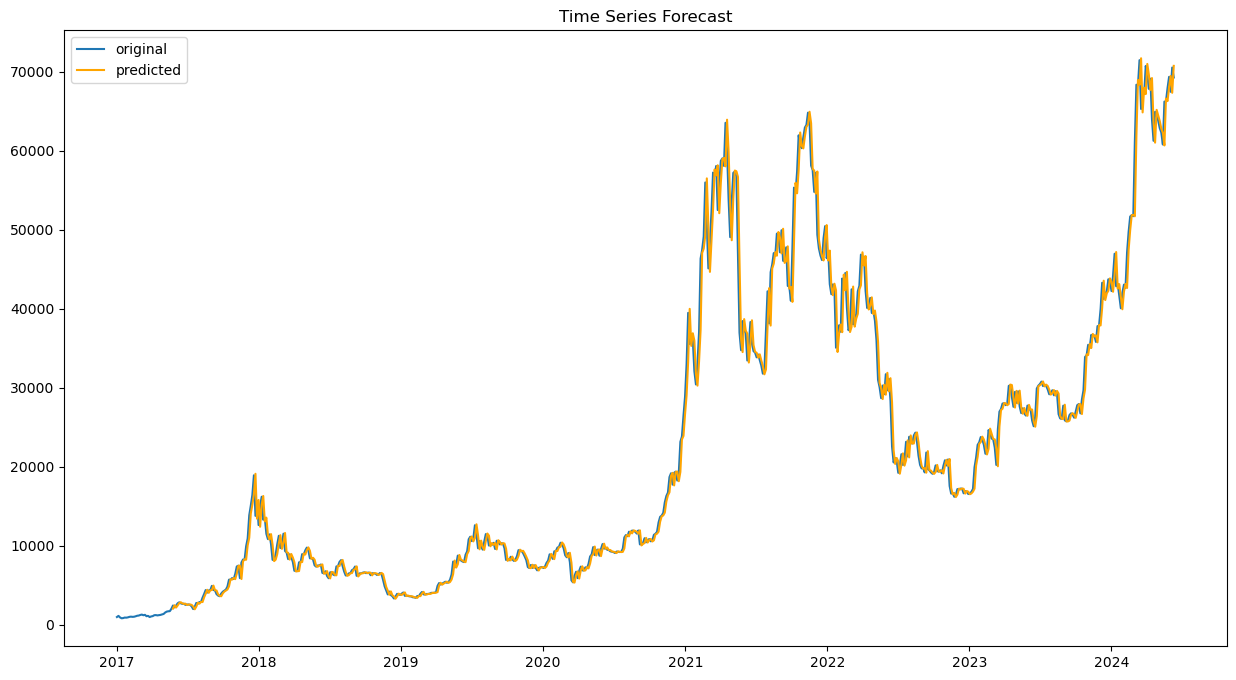

In [55]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(filtered_df, order=(1, 1, 1))
model_fit = model.fit()

start_index = pd.to_datetime('2017-05-25')
end_index = pd.to_datetime('2024-06-09')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(filtered_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [103]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(filtered_df, order=(3, 1, 21))
model_fit = model.fit()

start_index = pd.to_datetime('2017-05-25')
end_index = pd.to_datetime('2024-06-09')
forecast = model_fit.predict(start=start_index, end=end_index)



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(bitcoin_df['2017-05-25':'2024-06-09'], forecast)
print("Mean Squared Error", mse)

msle = mean_squared_log_error(bitcoin_df['2017-05-25':'2024-06-09'], forecast)
print("Mean Squared Error", msle)

Mean Squared Error 3797300.590615693
Mean Squared Error 0.005868040202577651


In [104]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(filtered_df['2017-05-25':'2024-06-09'], forecast)
print("Mean Squared Error", mse)

msle = mean_squared_log_error(filtered_df['2017-05-25':'2024-06-09'], forecast)
print("Mean Squared Error", msle)

Mean Squared Error 3539985.7688394836
Mean Squared Error 0.006042417768467167


In [ ]:
3797300  1/1
3797819  4/3
5019262  3/4
9023754  2/4
3786817  4/2
3797209  2/1

3756626 2/1/2
3838605 2/3/2
3751875 3/1/2
3587915 1/1/21

Original Data ADF Test:
ADF Test Statistic        -0.072596
p-value                    0.952101
# Lags Used               19.000000
# Observations Used     1390.000000
Critical Value (1%)       -3.435063
Critical Value (5%)       -2.863622
Critical Value (10%)      -2.567878
Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root, indicating it is non-stationary

1st Order Differenced Data ADF Test:
ADF Test Statistic     -8.007746e+00
p-value                 2.243878e-12
# Lags Used             1.800000e+01
# Observations Used     1.390000e+03
Critical Value (1%)    -3.435063e+00
Critical Value (5%)    -2.863622e+00
Critical Value (10%)   -2.567878e+00
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

2nd Order Differenced Data ADF Test:
ADF Test Statistic     -1.344593e+01
p-value                 3.765138e-25
# Lags Used             2.100000e+01
# Observations Used     1.386000

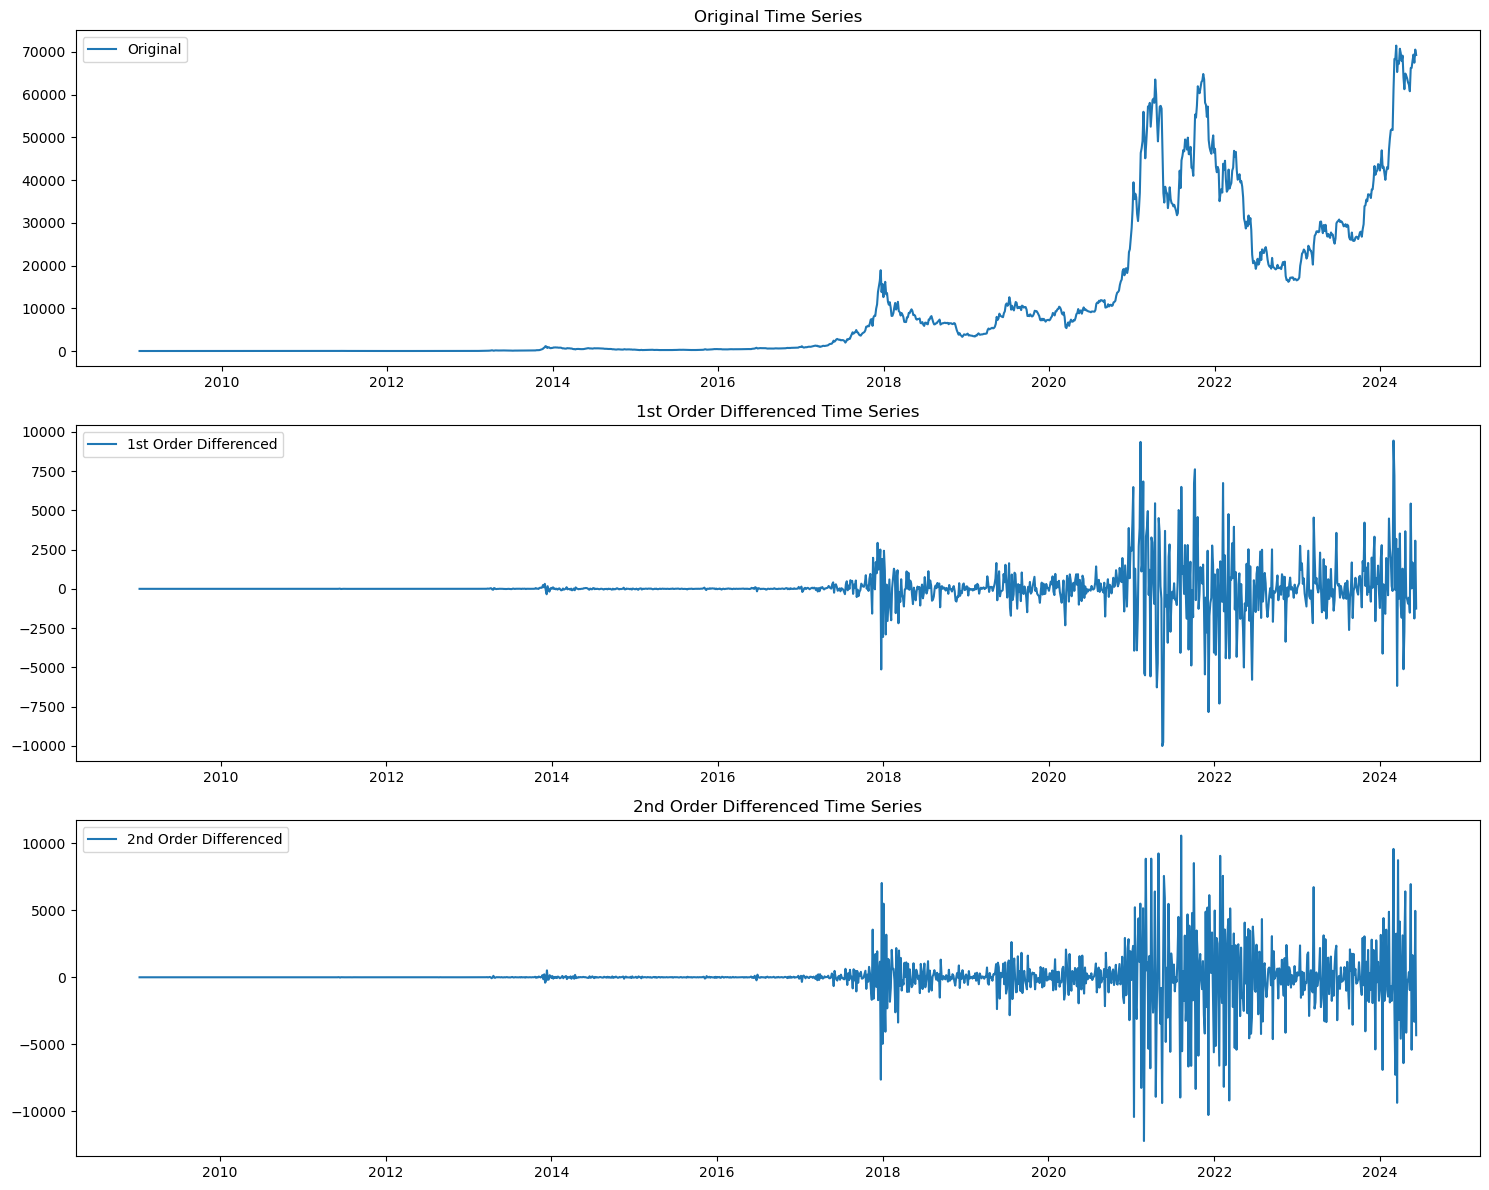

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF 테스트 함수 정의
def adf_test(series, title=''):
    result = adfuller(series.dropna())
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root, indicating it is non-stationary")

# 원본 데이터 ADF 테스트
print('Original Data ADF Test:')
adf_test(bitcoin_df['y'])

# 1차 차분 데이터 ADF 테스트
bitcoin_diff1 = bitcoin_df['y'].diff().dropna()
print('\n1st Order Differenced Data ADF Test:')
adf_test(bitcoin_diff1)

# 2차 차분 데이터 ADF 테스트
bitcoin_diff2 = bitcoin_diff1.diff().dropna()
print('\n2nd Order Differenced Data ADF Test:')
adf_test(bitcoin_diff2)

# 차분 데이터 시각화
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

ax[0].plot(bitcoin_df['y'], label='Original')
ax[0].set_title('Original Time Series')
ax[0].legend()

ax[1].plot(bitcoin_diff1, label='1st Order Differenced')
ax[1].set_title('1st Order Differenced Time Series')
ax[1].legend()

ax[2].plot(bitcoin_diff2, label='2nd Order Differenced')
ax[2].set_title('2nd Order Differenced Time Series')
ax[2].legend()

plt.tight_layout()
plt.show()